#**Part 1**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas


def HammingDistance(image1,image2):
  count = 0
  for i in range(len(image1)):
    for j in range(len(image1[0])):
      if(image1[i][j] != image2[i][j]):
        count+=1
  return count


gallerySet = []
for i in range(1,101):
  img1 = plt.imread("GallerySet/subject"+str(i)+"_img1.pgm")
  gallerySet.append(img1)

probeSet = []
for i in range(1,101):
  img2 = plt.imread("ProbeSet/subject"+str(i)+"_img2.pgm")
  probeSet.append(img2)


def BinarizeImage(img):
    Threshold = 128
    img_bin = np.zeros_like(img)
    img_bin[img > Threshold] = 1
    return img_bin

for i in range(len(gallerySet)):
    gallerySet[i] = BinarizeImage(gallerySet[i])
for i in range(len(probeSet)):
    probeSet[i] = BinarizeImage(probeSet[i])


ScoreMatrix = []
for i in range(len(probeSet)):
  ScoreMatrix.append([])
  for j in range(len(gallerySet)):
    ScoreMatrix[-1].append(HammingDistance(probeSet[i],gallerySet[j]))

# print(ScoreMatrix)

for i in range(10):
  for j in range(10):
    print(ScoreMatrix[i][j],end = " ")
  print()

GenuineScores = []
ImposterScores = []
for i in range(100):
  for j in range(100):
    if i == j:
      GenuineScores.append(ScoreMatrix[i][j])
    else:
      ImposterScores.append(ScoreMatrix[i][j])

GenuineMean = np.mean(GenuineScores)
ImposterMean = np.mean(ImposterScores)
GenuineSTD = np.std(GenuineScores)
ImposterSTD = np.std(ImposterScores)
# Compute d'
d_prime_A = ( np.sqrt(2) * abs((GenuineMean - ImposterMean)) ) / np.sqrt( (GenuineSTD ** 2 + ImposterSTD ** 2) )
print('d value:', d_prime_A)

492 837 916 926 791 833 703 808 498 1041 
748 309 766 712 615 743 841 648 652 757 
809 694 423 479 808 442 942 501 877 564 
828 585 588 292 643 535 717 550 762 571 
822 573 568 584 401 681 777 418 618 627 
657 690 545 545 810 142 750 539 785 694 
733 792 907 781 774 780 190 819 659 868 
693 630 477 523 608 524 774 159 643 696 
587 534 769 701 560 678 612 565 293 852 
972 701 582 546 627 633 833 578 928 195 
d value: 2.9104273051320035


# **Part 2**

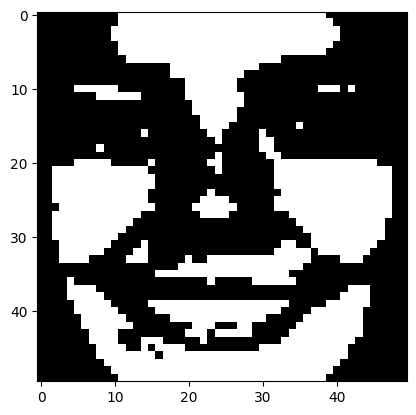

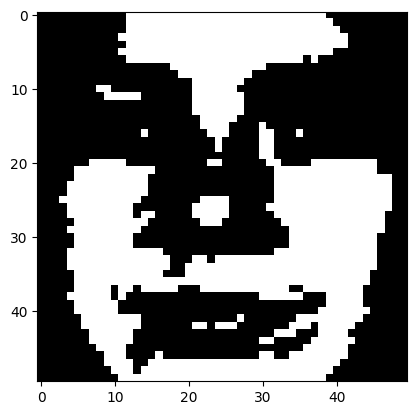

498 832 911 892 796 813 650 1068 480 1017 
742 274 717 682 560 731 776 880 640 711 
792 674 401 486 760 427 890 780 880 523 
810 566 583 306 592 553 698 822 756 509 
799 539 540 559 401 664 759 661 643 588 
624 664 529 552 760 143 706 790 760 637 
677 751 890 725 791 746 183 1041 601 820 
648 632 489 540 590 481 690 508 648 677 
822 768 985 986 786 917 812 564 610 1069 
948 658 537 524 564 629 822 792 922 177 
d value: 5.8816731165010765


In [ ]:
# Import required libraries
import cv2
import numpy as np
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
from skimage.feature import local_binary_pattern

# Load images
gallerySet = []
probeSet = []
for i in range(1, 101):
    # Read images
    img1 = cv2.imread("GallerySet/subject"+str(i)+"_img1.pgm", cv2.IMREAD_GRAYSCALE)
    img2 = cv2.imread("ProbeSet/subject"+str(i)+"_img2.pgm", cv2.IMREAD_GRAYSCALE)
    # Add image normalization
    img1 = cv2.normalize(img1, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
    img2 = cv2.normalize(img2, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
    # Binarize images using Otsu's thresholding
    Threshold, img1_bin = cv2.threshold(img1, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    Threshold_Value, img2_bin = cv2.threshold(img2, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

    # Add binarized images to respective sets
    gallerySet.append(img1_bin)
    probeSet.append(img2_bin)

#Training the Face Recognition Model using Local Binary Pattern Histogram (LBPH)
FaceRecognizer = cv2.face.LBPHFaceRecognizer_create()
FaceRecognizer.train(gallerySet, np.array(range(1, 101)))

# Display an example image from the gallery set and the probe set
plt.imshow(gallerySet[4], cmap='gray')
plt.show()
plt.imshow(probeSet[4],cmap='gray')
plt.show()

# Compute Hamming distances between all pairs of images in the probe set and the gallery set
ScoreMatrix = []
for i in range(len(probeSet)):
    ScoreMatrix.append([])
    for j in range(len(gallerySet)):
        probeVec = probeSet[i].flatten()
        galleryVec = gallerySet[j].flatten()
        HammingDistance = np.count_nonzero(probeVec != galleryVec)
        ScoreMatrix[-1].append(HammingDistance)

# Print the Hamming distance matrix for the first 10 images
for i in range(10):
  for j in range(10):
    print(ScoreMatrix[i][j],end = " ")
  print()

# Compute genuine and imposter scores for each pair of images in the probe set and the gallery set
GenuineScores = []
ImposterScores = []
for i in range(100):
    for j in range(100):
        if i == j:
            # Compute the confidence score for genuine matches using the trained face recognition model
            label, confidence = FaceRecognizer.predict(probeSet[i])
            GenuineScores.append(confidence)
        else:
            # Add the Hamming distance as an imposter score
            ImposterScores.append(ScoreMatrix[i][j])

# Compute means and standard deviations of the genuine and imposter scores
GenuineMean = np.mean(GenuineScores)
ImposterMean = np.mean(ImposterScores)
GenuineSTD = np.std(GenuineScores)
ImposterSTD = np.std(ImposterScores)

# Compute d'
d_prime = (np.sqrt(2) * abs(GenuineMean - ImposterMean)) / np.sqrt(GenuineSTD ** 2 + ImposterSTD ** 2)
print('d value:', d_prime)



# New Section

In [ ]:

DeltaDPrime = d_prime - d_prime_A
ImprovementFactor = round(DeltaDPrime, 2)
print('Improvement factor:', ImprovementFactor)


Improvement factor: 2.97


In [ ]:
#hamming distance
def hamming_distance(image1,image2):
  count = 0
  for i in range(len(image1)):
    for j in range(len(image1[0])):
      if(image1[i][j] != image2[i][j]):
        count+=1
  return count

  # Compute score matrix
score_matrix = []
for i in range(len(probeSet)):
    score_matrix.append([])
    for j in range(len(gallerySet)):
        score_matrix[-1].append(hamming_distance(probeSet[i],gallerySet[j]))

In [ ]:
import cv2
import numpy as np
from skimage.feature import hog
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

# Load images
gallerySet = []
probeSet = []
for i in range(1, 101):
    img1 = cv2.imread("GallerySet/subject"+str(i)+"_img1.pgm", cv2.IMREAD_GRAYSCALE)
    img2 = cv2.imread("ProbeSet/subject"+str(i)+"_img2.pgm", cv2.IMREAD_GRAYSCALE)
   # Apply histogram equalization
    img1 = cv2.equalizeHist(img1)
    img2 = cv2.equalizeHist(img2)
    # Binarize images using Otsu's thresholding
    Threshold, img1_bin = cv2.threshold(img1, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    Threshold_Value, img2_bin = cv2.threshold(img2, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    gallerySet.append(img1_bin)
    probeSet.append(img2_bin)

# Extract HOG features from images
gallery_hog_features = []
for img in gallerySet:
    features = hog(img, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), block_norm='L2-Hys', feature_vector=True)
    gallery_hog_features.append(features)

probe_hog_features = []
for img in probeSet:
    features = hog(img, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), block_norm='L2-Hys', feature_vector=True)
    probe_hog_features.append(features)

# Train SVM classifier
X_train = np.array(gallery_hog_features)
y_train = np.arange(1, 101)
svm = SVC(kernel='linear', C=2, random_state=50)
svm.fit(X_train, y_train)

# Test SVM classifier on ProbeSet
y_pred = []
for i in range(100):
    X_test = np.array([probe_hog_features[i]])
    y_pred.append(svm.predict(X_test))

# Calculate genuine and imposter scores
genuine_scores = []
imposter_scores = []
for i in range(100):
    for j in range(100):
        if i == j:
            genuine_scores.append(1 if y_pred[i] == i+1 else 0)
        else:
            imposter_scores.append(1 if y_pred[i] == j+1 else 0)

# Calculate the decidability index (d')
genuine_mean = np.mean(genuine_scores)
imposter_mean = np.mean(imposter_scores)
genuine_std = np.std(genuine_scores)
imposter_std = np.std(imposter_scores)
d_prime = (np.sqrt(2) * abs(genuine_mean - imposter_mean)) / np.sqrt(genuine_std ** 2 + imposter_std ** 2)

print("d' value using HOG features and SVM classification:", d_prime)


d' value using HOG features and SVM classification: 2.8036757143453013


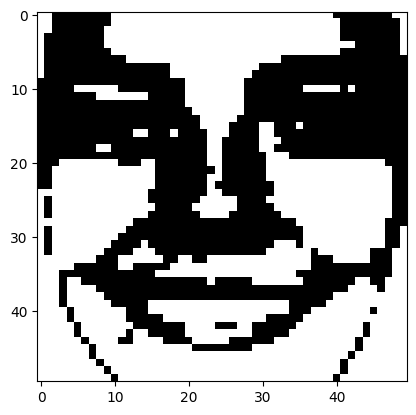

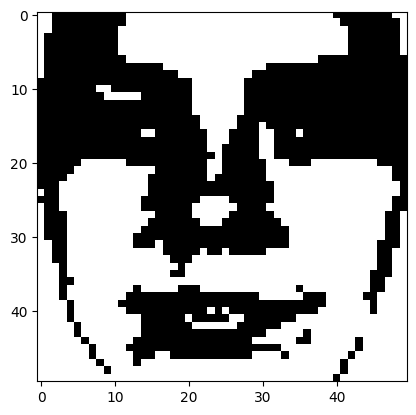

497 846 917 925 800 834 711 807 503 1034 
756 307 764 704 617 741 816 652 646 737 
812 691 436 486 815 443 928 506 866 565 
833 580 587 295 644 538 705 555 749 566 
832 571 572 582 403 687 770 422 618 621 
651 690 547 549 810 144 735 535 775 688 
730 789 906 780 793 781 194 822 674 859 
695 636 475 525 610 520 769 157 647 688 
585 536 765 691 568 674 601 565 291 834 
974 679 568 544 625 627 822 576 912 195 
d value: 7.340910941227702


In [ ]:
import cv2
import numpy as np
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
from skimage.feature import local_binary_pattern
from google.colab import drive

# Load images
gallerySet = []
probeSet = []
for i in range(1, 101):
    img1 = cv2.imread("GallerySet/subject"+str(i)+"_img1.pgm", cv2.IMREAD_GRAYSCALE)
    img2 = cv2.imread("ProbeSet/subject"+str(i)+"_img2.pgm", cv2.IMREAD_GRAYSCALE)
    # Apply histogram equalization
    img1 = cv2.equalizeHist(img1)
    img2 = cv2.equalizeHist(img2)
    # Add image normalization
    img1 = cv2.normalize(img1, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
    img2 = cv2.normalize(img2, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)

    Threshold, img1_bin = cv2.threshold(img1, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    Threshold_Value, img2_bin = cv2.threshold(img2, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    gallerySet.append(img1_bin)
    probeSet.append(img2_bin)

#Training the Face Recognition Model
face_recognizer = cv2.face.LBPHFaceRecognizer_create()
face_recognizer.train(gallerySet, np.array(range(1, 101)))

# Display an example image
plt.imshow(gallerySet[4], cmap='gray')
plt.show()
plt.imshow(probeSet[4],cmap='gray')
plt.show()

score_matrix = []
for i in range(len(probeSet)):
    score_matrix.append([])
    for j in range(len(gallerySet)):
        probe_vec = probeSet[i].flatten()
        gallery_vec = gallerySet[j].flatten()
        hamming_dist = np.count_nonzero(probe_vec != gallery_vec)
        score_matrix[-1].append(hamming_dist)

# Print the Hamming distance matrix for the first 10 images
for i in range(10):
  for j in range(10):
    print(score_matrix[i][j],end = " ")
  print()

genuine_scores = []
imposter_scores = []
for i in range(100):
    for j in range(100):
        if i == j:
            label, confidence = face_recognizer.predict(probeSet[i])
            genuine_scores.append(confidence)
        else:
            imposter_scores.append(score_matrix[i][j])

genuine_mean = np.mean(genuine_scores)
imposter_mean = np.mean(imposter_scores)
genuine_std = np.std(genuine_scores)
imposter_std = np.std(imposter_scores)
# Compute d'
d_prime = (np.sqrt(2) * abs(genuine_mean - imposter_mean)) / np.sqrt(genuine_std ** 2 + imposter_std ** 2)
print('d value:', d_prime)
